# 手写阿拉伯数字辨识 完整版

## 步骤1：载入 Cifar 10 资料

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 载入 MNIST 手写阿拉伯数字资料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 训练/测试资料的 X/y 维度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 步骤2：资料清理，此步骤无需进行

## 步骤3：进行特征工程，将特征缩放成(0, 1)之间

In [2]:
# 特征缩放，使用常态化(Normalization)，公式 = (x - min) / (max - min)
# 颜色范围：0~255，所以，公式简化为 x / 255
# 注意，颜色0为白色，与RGB颜色不同，(0,0,0) 为黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## 步骤4：资料分割，此步骤无需进行，载入MNIST资料时，已经切割好了

## 步骤5：建立模型结构

## 步骤6：结合训练资料及模型，进行模型训练

## 步骤7：评分(Score Model)

In [3]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(10)    
])

# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型训练
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 评分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10
1250/1250 [==============================] - 30s 23ms/step - loss: 1.7636 - accuracy: 0.3467 - val_loss: 1.3359 - val_accuracy: 0.5262
Epoch 2/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.2213 - accuracy: 0.5672 - val_loss: 1.1240 - val_accuracy: 0.6047
Epoch 3/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0472 - accuracy: 0.6329 - val_loss: 1.0387 - val_accuracy: 0.6339
Epoch 4/10
1250/1250 [==============================] - 27s 21ms/step - loss: 0.9239 - accuracy: 0.6743 - val_loss: 0.9419 - val_accuracy: 0.6724
Epoch 5/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8514 - accuracy: 0.7002 - val_loss: 0.9011 - val_accuracy: 0.6863
Epoch 6/10
1250/1250 [==============================] - 29s 24ms/step - loss: 0.7649 - accuracy: 0.7302 - val_loss: 0.9352 - val_accuracy: 0.6798
Epoch 7/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7057 - accuracy: 0.7532 - val_loss: 0.9059 -

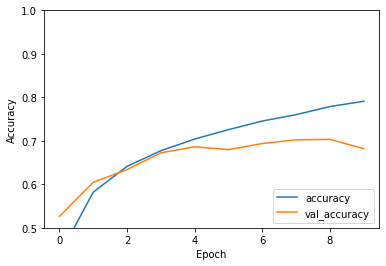

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6